In [3]:
install.packages("gridExtra")
install.packages("doBy")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’, ‘pbkrtest’, ‘Deriv’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(doBy)

In [84]:
#kalman=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_"))
interp=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_interp.txt"))
inter=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_linear_interpolation.txt"))
locf=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_locf.txt"))
mean=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_mean.txt"))
median=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_median.txt"))
malExp=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_stine_interpolation.txt"))
seadec=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_seadec.txt"))
seasplit=as.data.frame(read.table("../ESC/Randomicos/percentsIoTa/resultados/df_seasplit.txt"))

names(interp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(seadec)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(seasplit)=c("algoritmo" , "rmse", "mse", "mae", "mape")
todosIoTa= rbind(inter, locf, mean, median, malExp, malLin, malSim, spl, sti, seadec, seasplit)

#kalmanESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_"))
interpESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_interp.txt"))
interESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_linear_interpolation.txt"))
locfESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_locf.txt"))
meanESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_mean.txt"))
medianESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_median.txt"))
malExpESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_movingAverage_exponential.txt"))
malLinESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_movingAverage_linear.txt"))
malSimESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_movingAverage_simple.txt"))
splESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_spline_interpolation.txt"))
stiESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_stine_interpolation.txt"))
seadecESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_seadec.txt"))
seasplitESC=as.data.frame(read.table("../ESC/Randomicos/percentsESC/resultados/df_seasplit.txt"))
names(interpESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(interESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locfESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(meanESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(medianESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExpESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLinESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSimESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(splESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(stiESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(seadecESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(seasplitESC)=c("algoritmo" , "rmse", "mse", "mae", "mape")

todosESC= rbind(interESC, interpESC, locfESC, meanESC, medianESC, malExpESC, malLinESC, malSimESC, splESC, stiESC, seadecESC, seasplitESC)
      

In [85]:
mediaPercents = function(data_vector, metrica){
    retorno=c()
    media=c()
    sd=c()
    var=c()
    percents=seq (5,90,5)
#    algoritmo=as.character(data_vector$algoritmo)
    data_vector$percent=percents
    for(percent in seq (5,90,5)){
        media=append(media, mean(data_vector[which(data_vector$percent==percent),metrica]))
        sd =append(sd, sd(data_vector[which(data_vector$percent==percent),metrica]))
        var=append(var, var(data_vector[which(data_vector$percent==percent),metrica]))
    }
    retorno=cbind(percents, media, sd,var)
    return(retorno)
}

In [86]:
percents=seq(5,90,5)

#parametros: data_vector: resultados da série temporal // metrica: métrica de erro // quarto: posicao(2-4)
mediaPercentSti=as.data.frame(mediaPercents(sti, "rmse"))
mediaPercentSti$algoritmo="Sti"

mediaPercentInter=as.data.frame(mediaPercents(inter, "rmse"))
mediaPercentInter$algoritmo="Inter"

mediaPercentInterp=as.data.frame(mediaPercents(interp, "rmse"))
mediaPercentInterp$algoritmo="Interp"

mediaPercentLocf=as.data.frame(mediaPercents(locf, "rmse"))
mediaPercentLocf$algoritmo="locf"

mediaPercentMean=as.data.frame(mediaPercents(mean, "rmse"))
mediaPercentMean$algoritmo="Mean"

mediaPercentMedian=as.data.frame(mediaPercents(median, "rmse"))
mediaPercentMedian$algoritmo="Median"

mediaPercentEMA=as.data.frame(mediaPercents(malExp, "rmse"))
mediaPercentEMA$algoritmo="EMA"

mediaPercentSMA=as.data.frame(mediaPercents(malSim, "rmse"))
mediaPercentSMA$algoritmo="SMA"

mediaPercentLMA=as.data.frame(mediaPercents(malLin, "rmse"))
mediaPercentLMA$algoritmo="LMA"

mediaPercentSpl=as.data.frame(mediaPercents(spl, "rmse"))
mediaPercentSpl$algoritmo="Spl"


mediaPercentSeadec=as.data.frame(mediaPercents(seadec, "rmse"))
mediaPercentSeadec$algoritmo="Seadec"

mediaPercentSeasplit=as.data.frame(mediaPercents(seasplit, "rmse"))
mediaPercentSeasplit$algoritmo="Seasplit"





#parametros: data_vector: resultados da série temporal // metrica: métrica de erro // quarto: posicao(2-4)
mediaPercentStiESC=as.data.frame(mediaPercents(stiESC, "rmse"))
mediaPercentStiESC$algoritmo="Sti"

mediaPercentInterESC=as.data.frame(mediaPercents(interESC, "rmse"))
mediaPercentInterESC$algoritmo="Inter"

mediaPercentInterpESC=as.data.frame(mediaPercents(interpESC, "rmse"))
mediaPercentInterpESC$algoritmo="Interp"

mediaPercentLocfESC=as.data.frame(mediaPercents(locfESC, "rmse"))
mediaPercentLocfESC$algoritmo="locf"

mediaPercentMeanESC=as.data.frame(mediaPercents(meanESC, "rmse"))
mediaPercentMeanESC$algoritmo="Mean"

mediaPercentMedianESC=as.data.frame(mediaPercents(medianESC, "rmse"))
mediaPercentMedianESC$algoritmo="Median"

mediaPercentEMAESC=as.data.frame(mediaPercents(malExpESC, "rmse"))
mediaPercentEMAESC$algoritmo="EMA"

mediaPercentSMAESC=as.data.frame(mediaPercents(malSimESC, "rmse"))
mediaPercentSMAESC$algoritmo="SMA"

mediaPercentLMAESC=as.data.frame(mediaPercents(malLinESC, "rmse"))
mediaPercentLMAESC$algoritmo="LMA"

mediaPercentSplESC=as.data.frame(mediaPercents(splESC, "rmse"))
mediaPercentSplESC$algoritmo="Spl"


mediaPercentSeadecESC=as.data.frame(mediaPercents(seadec, "rmse"))
mediaPercentSeadecESC$algoritmo="Seadec"

mediaPercentSeasplitESC=as.data.frame(mediaPercents(seasplit, "rmse"))
mediaPercentSeasplitESC$algoritmo="Seasplit"


#todasMediasIoTa=rbind(mediaPercentSeasplit, mediaPercentSeadec,mediaPercentSpl, mediaPercentLMA, mediaPercentSMA, mediaPercentEMA, mediaPercentLocf, mediaPercentInter, mediaPercentSti, mediaPercentMedian, mediaPercentMean)
todasMediasIoTa=rbind(mediaPercentSpl, mediaPercentLMA, mediaPercentSMA, mediaPercentEMA, mediaPercentLocf, mediaPercentInter, mediaPercentSti, mediaPercentMedian, mediaPercentMean)

names(todasMediasIoTa)=c("percent", "mean", "sd", "var", "algoritmo")
todasMediasIoTa$dataset="IoTa"


todasMediasESC=rbind(mediaPercentSplESC, mediaPercentLMAESC, mediaPercentSMAESC, mediaPercentEMAESC, mediaPercentLocfESC, mediaPercentInterESC, mediaPercentStiESC, mediaPercentMedianESC, mediaPercentMeanESC)
names(todasMediasESC)=c("percent", "mean", "sd", "var", "algoritmo")
todasMediasESC$dataset="ESC"

todasMedias=rbind(todasMediasIoTa, todasMediasESC)





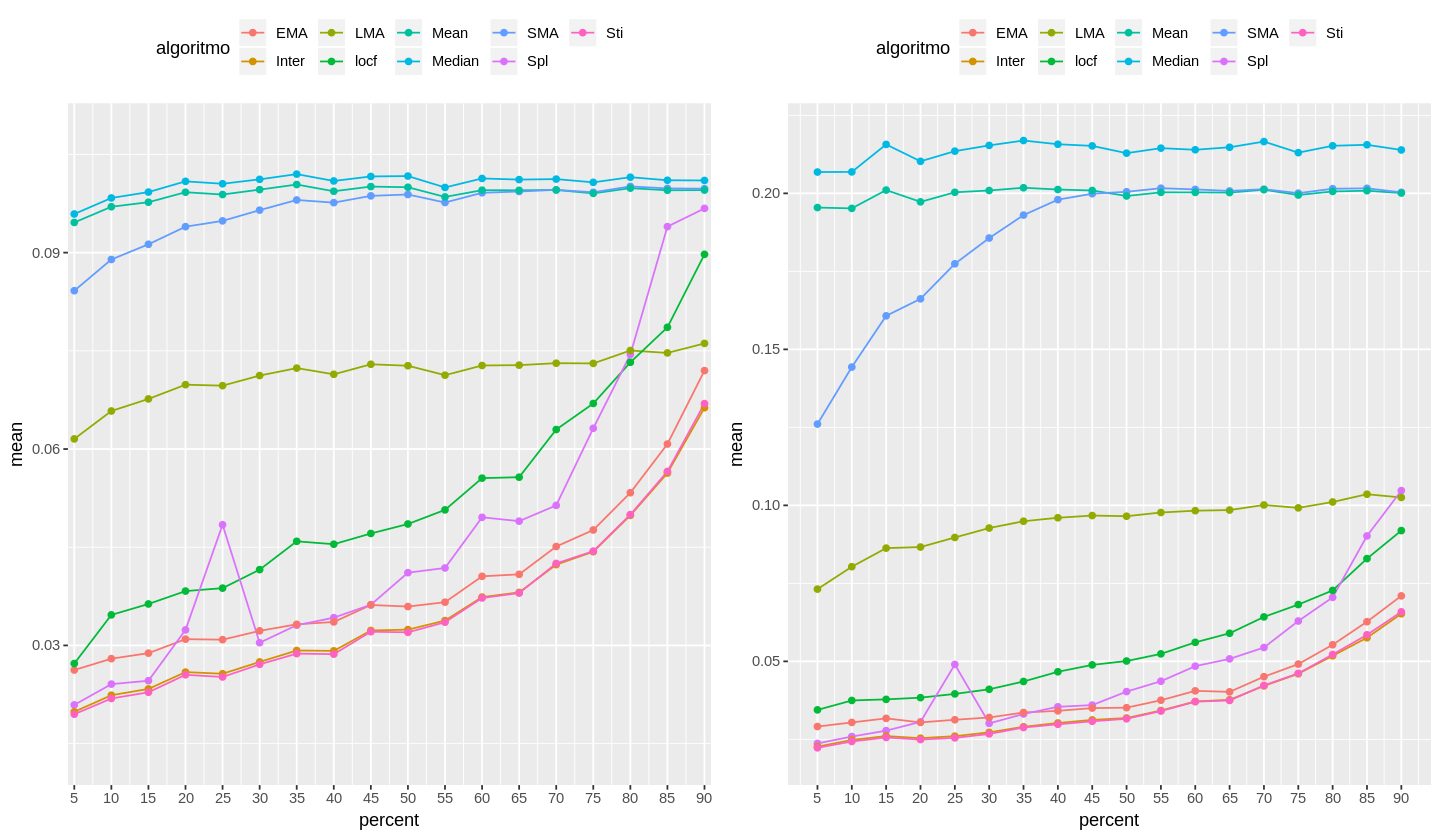

In [87]:
xBreak=seq(5,90,5)
xLabel=seq(5,90,5)

options(repr.plot.width=12, rep.plot.height=5)
p1=ggplot(todasMedias[which(todasMedias$dataset=="ESC"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    geom_point()+
    scale_x_continuous(expand = c(0.01, 0.01), breaks= xBreak, label = xLabel) + 
    scale_y_continuous(expand = c(0.01, 0.01))+
    theme(legend.position = "top", legend.direction = "horizontal")
p2=ggplot(todasMedias[which(todasMedias$dataset=="IoTa"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
   geom_point()+
    #ylim()+
    scale_x_continuous(expand = c(0.05, 0.05), breaks= xBreak, label = xLabel) + 
    scale_y_continuous(expand = c(0.01, 0.01))+
    theme(legend.position = "top", legend.direction = "horizontal")
grid.arrange(p1,p2,nrow=1)

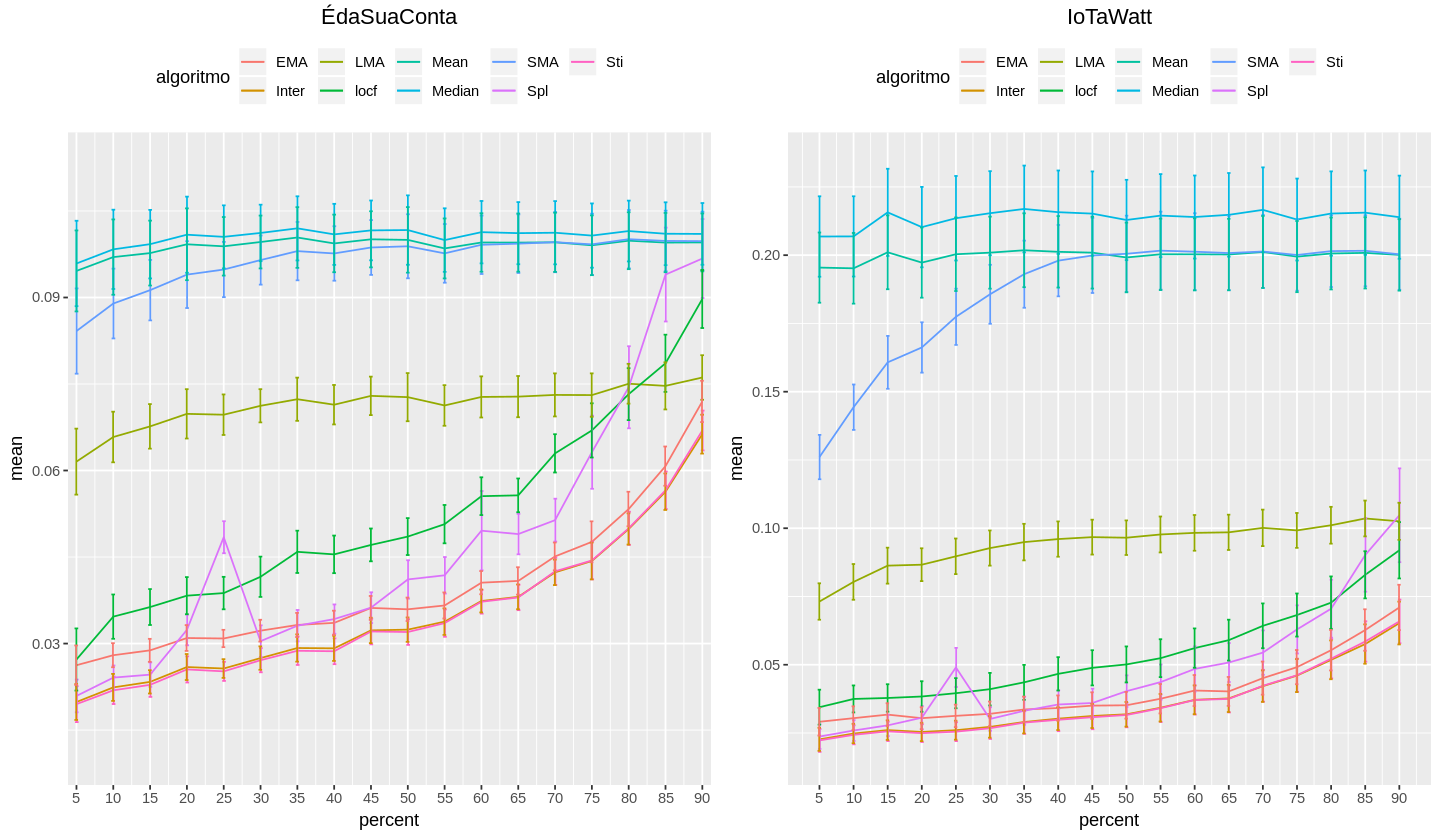

In [88]:
n=30 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todasMedias$sd/sqrt(n)
todasMedias$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

p1=ggplot(todasMedias[which(todasMedias$dataset=="ESC"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    ggtitle("ÉdaSuaConta")+  theme(plot.title = element_text(hjust = 0.5)) +
    #geom_point()+
    scale_x_continuous(expand = c(0.01, 0.01), breaks= xBreak, label = xLabel) + 
    scale_y_continuous(expand = c(0.01, 0.01))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(legend.position = "top", legend.direction = "horizontal")
p2=ggplot(todasMedias[which(todasMedias$dataset=="IoTa"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    ggtitle("IoTaWatt")+  theme(plot.title = element_text(hjust = 0.5)) +

   #geom_point()+
    scale_x_continuous(expand = c(0.05, 0.05), breaks= xBreak, label = xLabel) + 
    scale_y_continuous(expand = c(0.01, 0.01))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    theme(legend.position = "top", legend.direction = "horizontal")
grid.arrange(p1,p2,nrow=1)


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


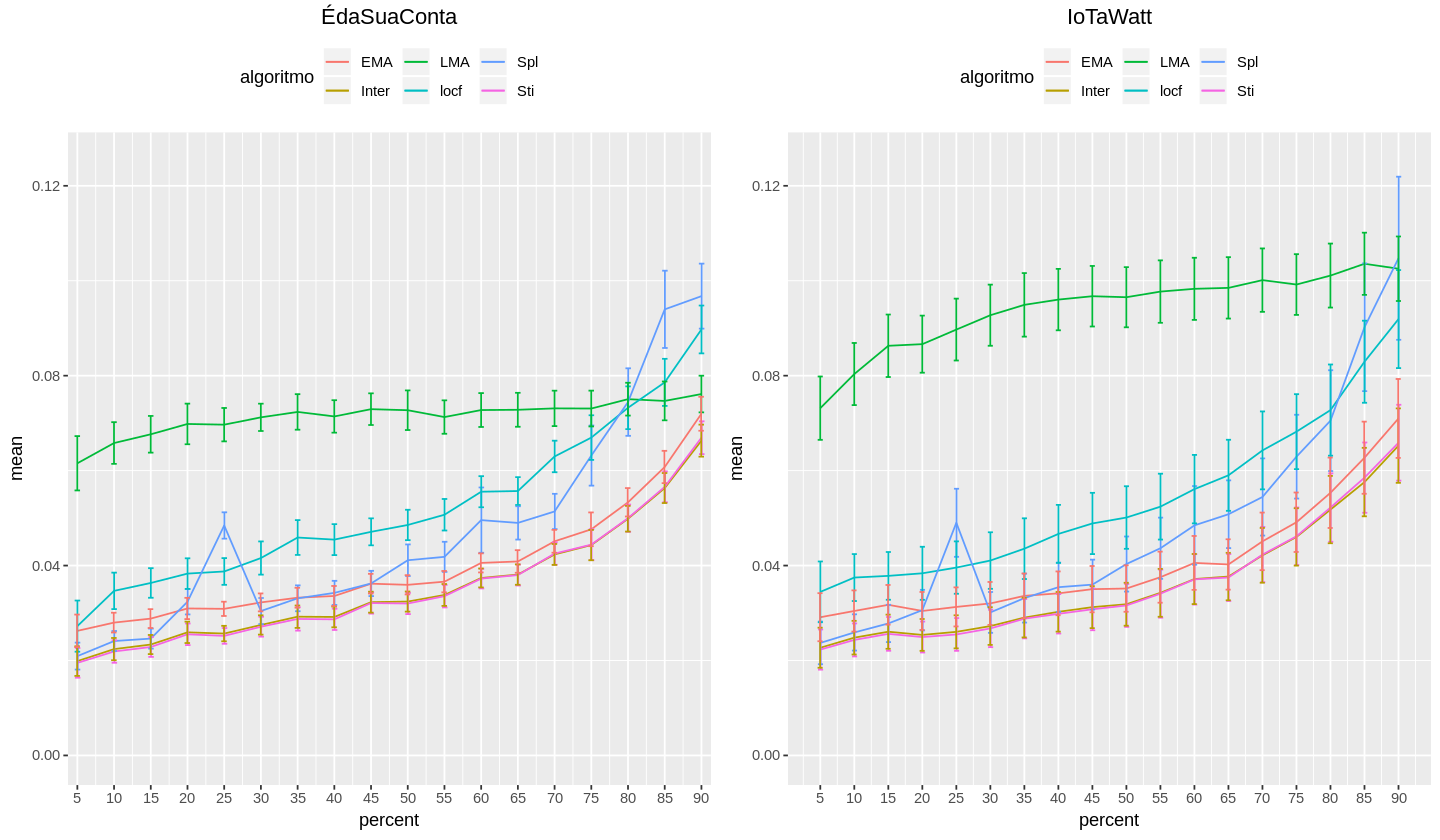

In [89]:
n=30 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todasMedias$sd/sqrt(n)
todasMedias$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

min=0
max=0.125

p1=ggplot(todasMedias[which(todasMedias$dataset=="ESC" & todasMedias$algoritmo!="SMA" & todasMedias$algoritmo!="Mean" & todasMedias$algoritmo!="Median"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    ggtitle("ÉdaSuaConta")+  theme(plot.title = element_text(hjust = 0.5)) +
    #geom_point()+
    scale_x_continuous(expand = c(0.01, 0.01), breaks= xBreak, label = xLabel) + 
    scale_y_continuous(expand = c(0.01, 0.01))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    ylim(min,max)+
    theme(legend.position = "top", legend.direction = "horizontal")
p2=ggplot(todasMedias[which(todasMedias$dataset=="IoTa" & todasMedias$algoritmo!="SMA" & todasMedias$algoritmo!="Mean" & todasMedias$algoritmo!="Median"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    ggtitle("IoTaWatt")+  theme(plot.title = element_text(hjust = 0.5)) +

   #geom_point()+
    scale_x_continuous(expand = c(0.05, 0.05), breaks= xBreak, label = xLabel) + 
    scale_y_continuous(expand = c(0.01, 0.01))+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), position=pd) +
    ylim(min,max)+
    theme(legend.position = "top", legend.direction = "horizontal")
grid.arrange(p1,p2,nrow=1)


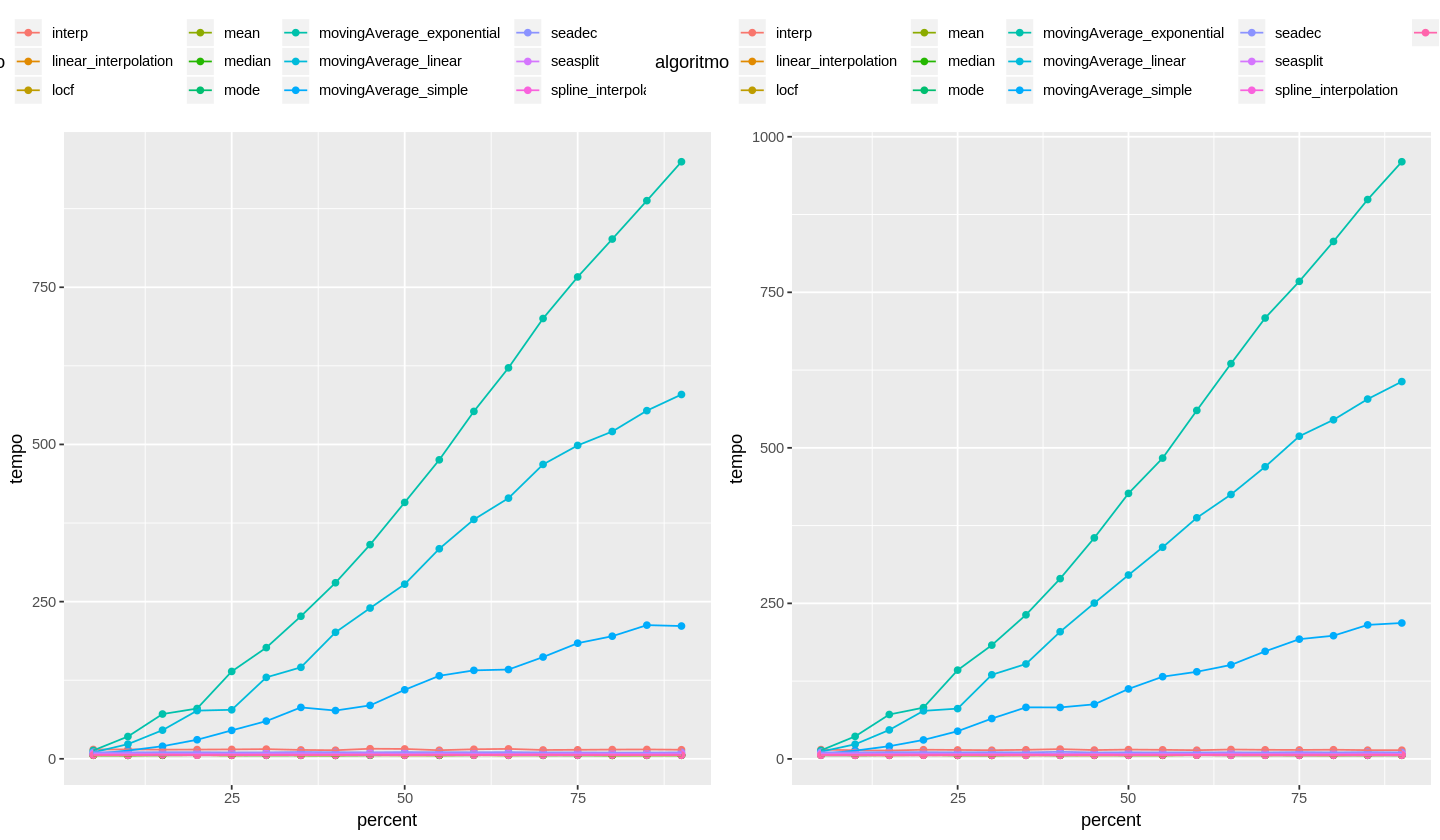

In [129]:
algoritmosESC=read.table("../ESC/Randomicos/percentsESC/time/alg.txt")
tempoESC=read.table("../ESC/Randomicos/percentsESC/time/tempo.txt")
algTempESC=as.data.frame(cbind(algoritmosESC,tempoESC))
names (algTempESC)= c("algoritmo", "tempo")
algTempESC$percent=percents
algTempESC$tempo=as.numeric(hms(algTempESC$tempo))


algoritmosIoTa=read.table("../ESC/Randomicos/percentsIoTa/time/alg.txt")
tempoIoTa=read.table("../ESC/Randomicos/percentsIoTa/time/tempo.txt")
algTempIoTa=as.data.frame(cbind(algoritmosIoTa,tempoIoTa))
names (algTempIoTa)= c("algoritmo", "tempo")
algTempIoTa$percent=percents
algTempIoTa$tempo=as.numeric(hms(algTempIoTa$tempo))


algTempMediaESC=algTempESC %>% group_by(algoritmo, percent) %>% summarize(tempo = mean(tempo, na.rm = TRUE))
algTempMediaESCSD=algTempESC %>% group_by(algoritmo, percent) %>% summarize(sd = sd(tempo, na.rm = TRUE))
algTempMediaESC$sd=algTempMediaESCSD$sd
algTempMediaESC$dataset="ESC"


algTempMediaIoTa=algTempIoTa %>% group_by(algoritmo, percent) %>%summarize(tempo = mean(tempo, na.rm = TRUE))
algTempMediaIoTaSD=algTempIoTa %>% group_by(algoritmo, percent) %>%summarize(sd = sd(tempo, na.rm = TRUE))
algTempMediaIoTa$sd=algTempMediaIoTaSD$sd
algTempMediaIoTa$dataset="IoTa"

mediasTempo=rbind(algTempMediaIoTa, algTempMediaESC)

p1=ggplot(mediasTempo[which(mediasTempo$dataset=="ESC"),], aes(x=percent, y=tempo, colour=algoritmo))+
#& (algTempMediaESC$algoritmo!="kalmanArima" & algTempMediaESC$algoritmo!="movingAverage_linear" & algTempMediaESC$algoritmo!="movingAverage_exponential" & algTempMediaESC$algoritmo!="movingAverage_simple" ),
#ggplot(todosMedia, aes(x=percent, y=tempo, colour=algoritmo))+
geom_point()+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal")

p2=ggplot(mediasTempo[which(mediasTempo$dataset=="IoTa"),], aes(x=percent, y=tempo, colour=algoritmo))+
#ggplot(algTempMediaIoTa, aes(x=percent, y=tempo, colour=algoritmo))+
geom_point()+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal")
grid.arrange(p1,p2, ncol=2)


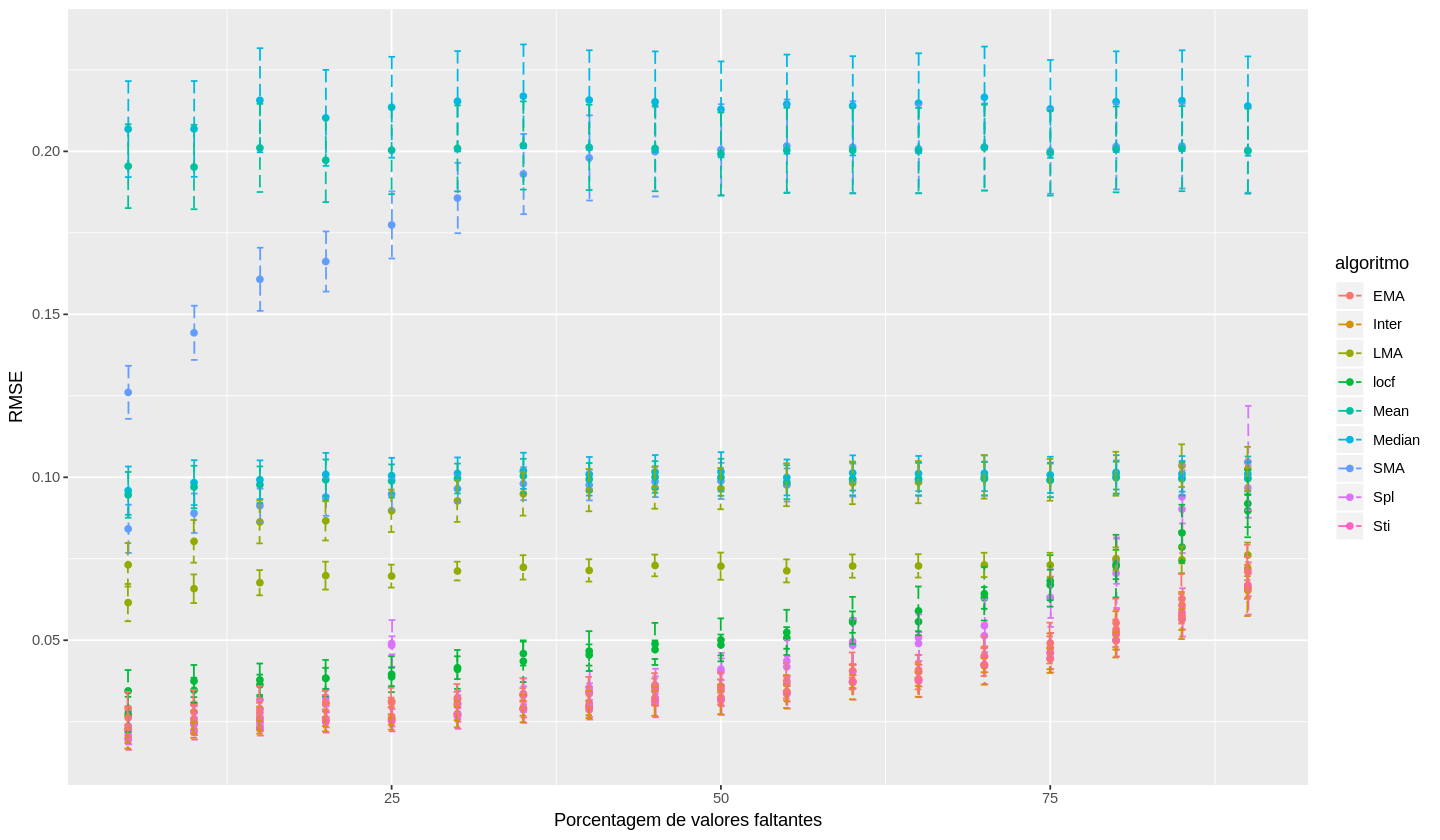

In [17]:


ggplot(todasMedias, aes(x=percent,y=mean, colour=algoritmo))+
    geom_point()+
  #  geom_line()+
    geom_errorbar(aes(ymin=mean-error, ymax=mean+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Porcentagem de valores faltantes")


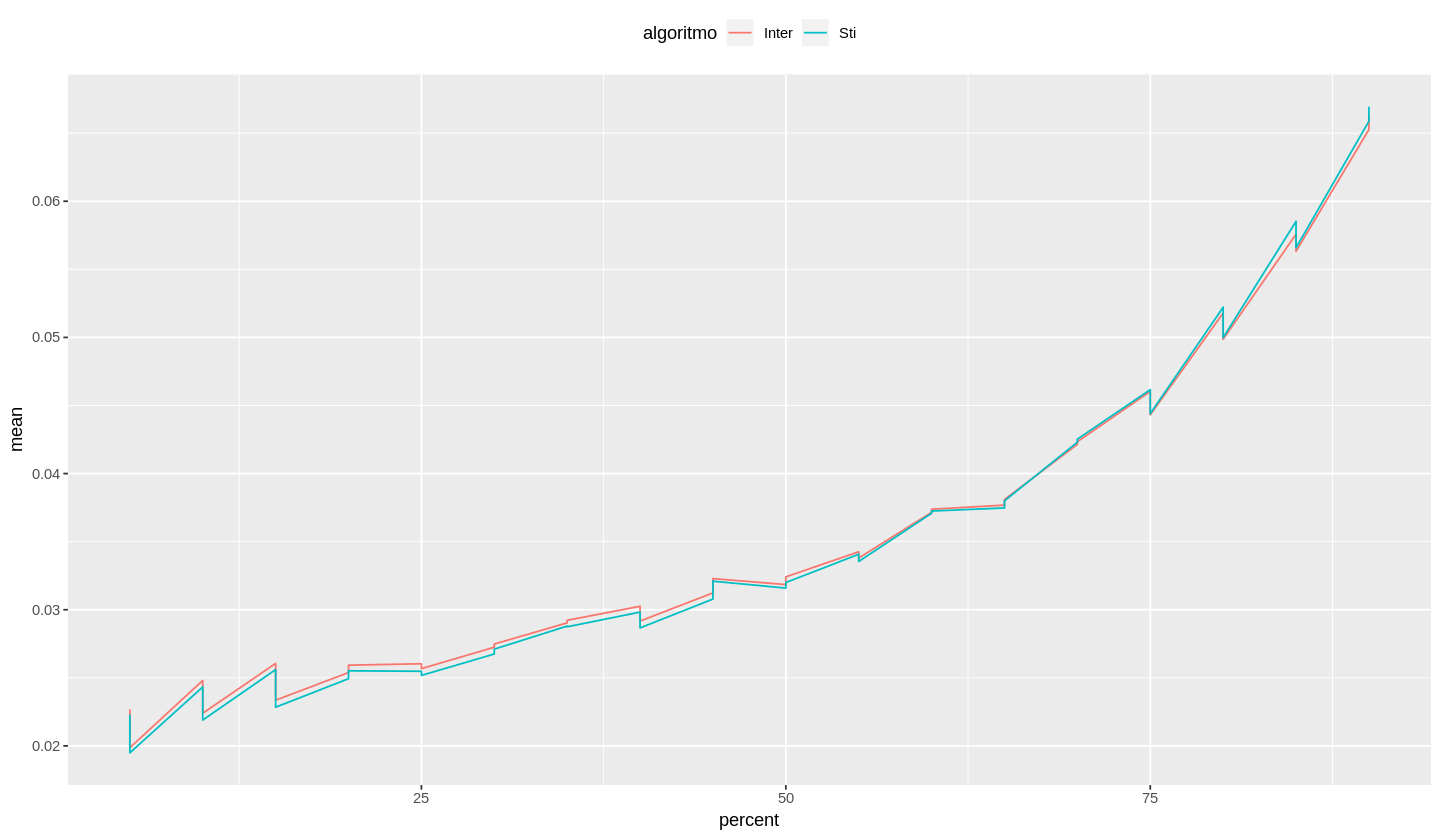

In [18]:
options(repr.plot.width=12, rep.plot.height=5)
ggplot(todasMedias[which(todasMedias$algoritmo=="Sti" | todasMedias$algoritmo=="Inter"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal")


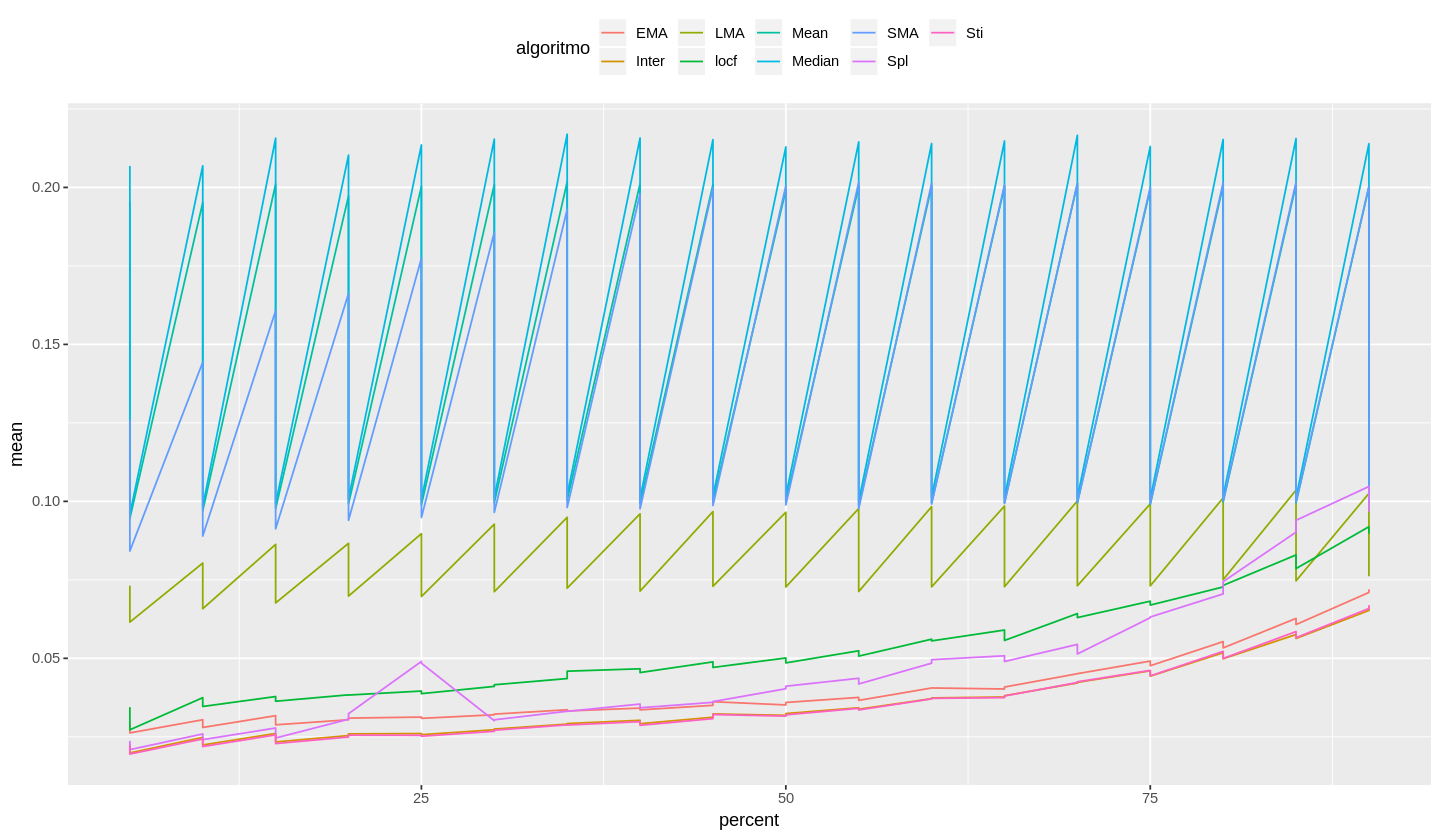

In [19]:
options(repr.plot.width=12, rep.plot.height=5)
ggplot(todasMedias, aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal")

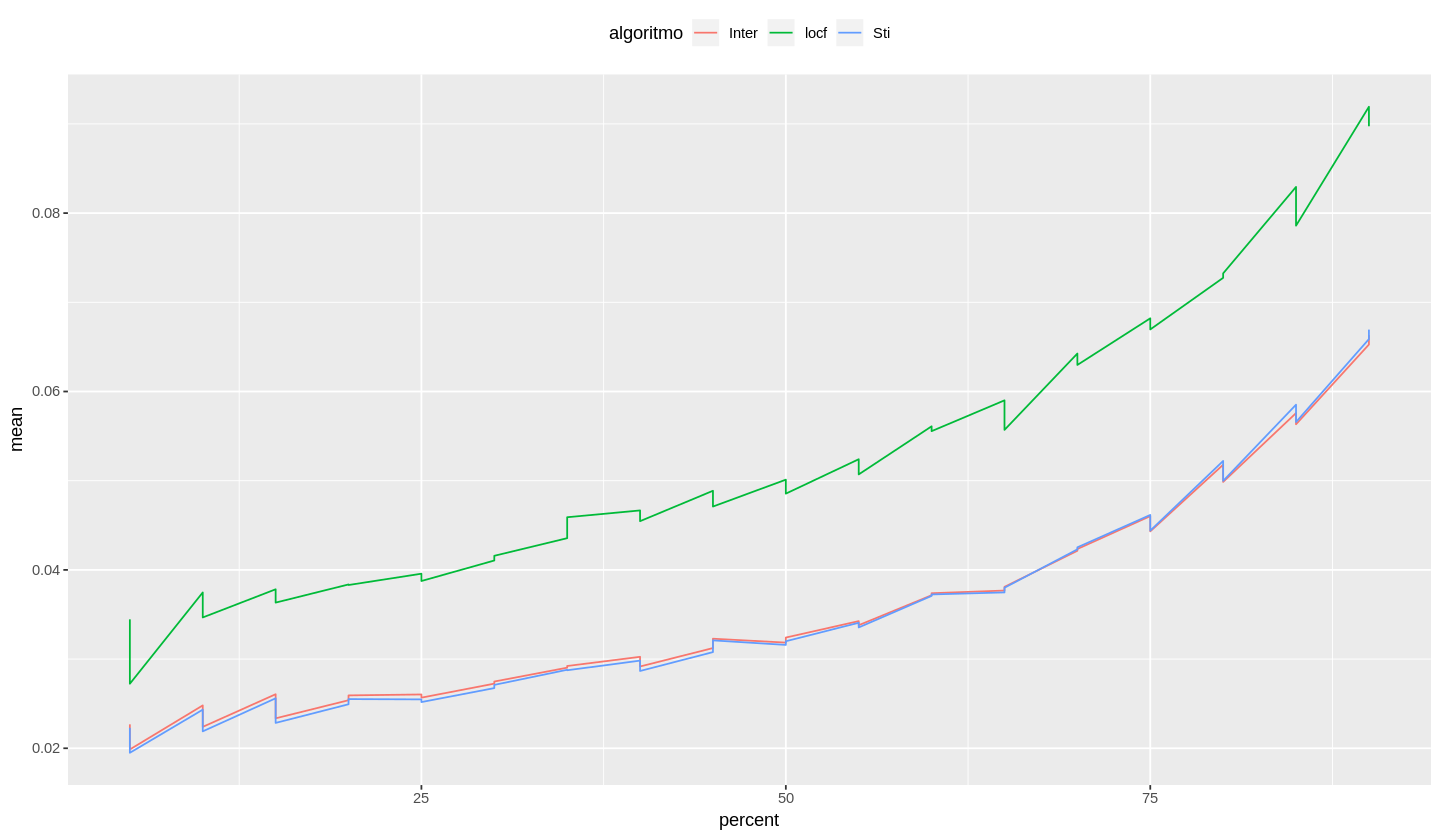

In [20]:
options(repr.plot.width=12, rep.plot.height=5)
ggplot(todasMedias[which(todasMedias$algoritmo=="locf" | todasMedias$algoritmo=="Inter" | todasMedias$algoritmo=="Sti"),], aes(x=percent, y=mean, colour=algoritmo))+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal")


In [21]:
install.packages("chron")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [22]:
library(chron)

In [23]:
tempo=read.table("../ESC/Randomicos/percentsESC/time/tempo.txt")
tempo=as.data.frame(tempo)
#times(paste0(tempo, "00:00:00"))


a=sum(tempo > "08:00")
a

Warning message in Ops.factor(left, right):
“‘>’ not meaningful for factors”

[1] NA

In [ ]:
ggplot(a, aes(x=percent, y=tempo, colour=algoritmo))+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal")

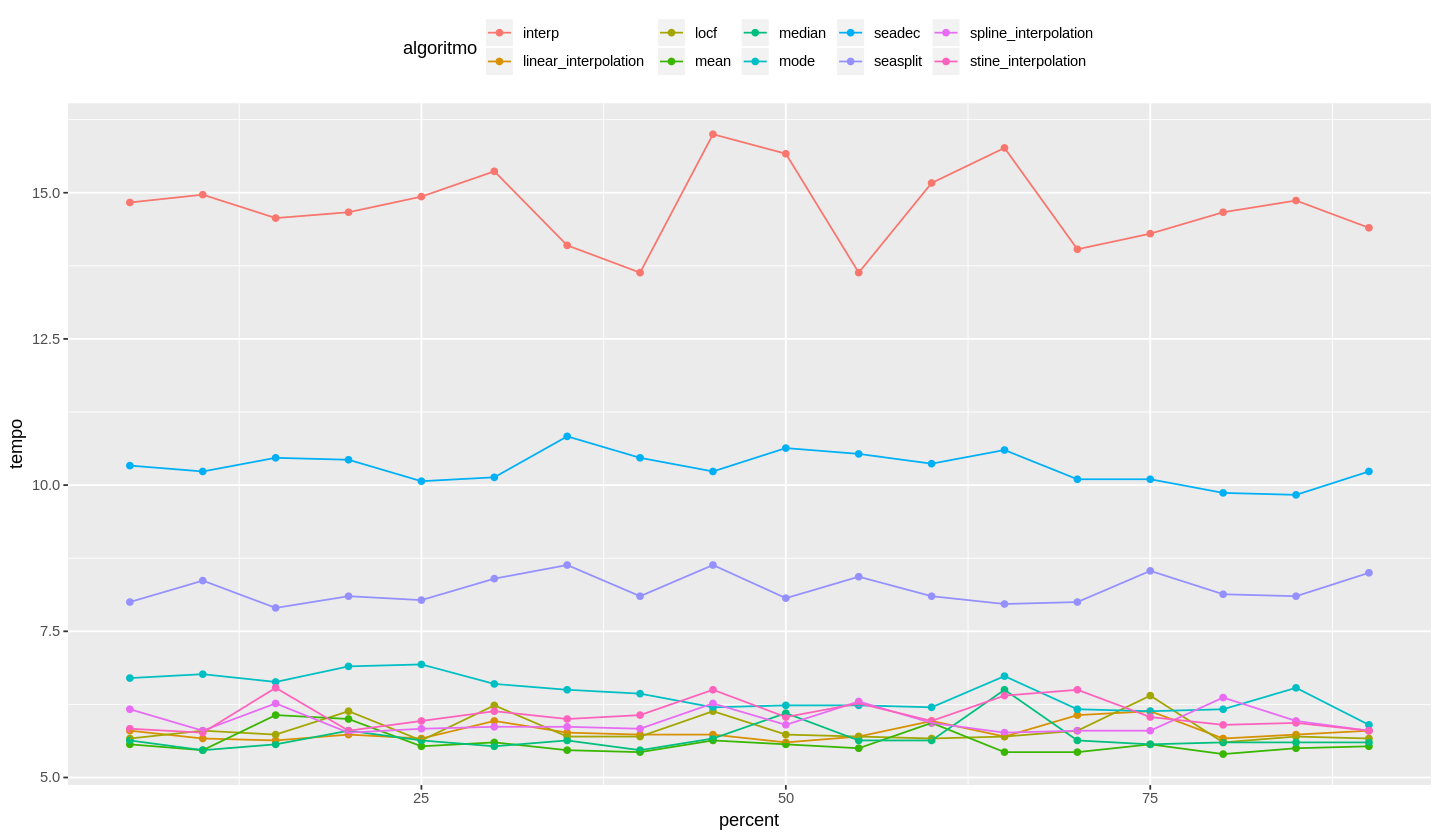

In [82]:
algoritmos=read.table("../ESC/Randomicos/percentsESC/time/alg.txt")
tempo=read.table("../ESC/Randomicos/percentsESC/time/tempo.txt")
a=as.data.frame(cbind(algoritmos,tempo))
names (a)= c("algoritmo", "tempo")
a$percent=percents
b=a
a$tempo=as.numeric(hms(a$tempo))
#head(a)
todosMedia=a %>%
  group_by(algoritmo, percent) %>%
  summarize(tempo = mean(tempo, na.rm = TRUE))
#head(todosMedia)

ggplot(todosMedia[which(todosMedia$algoritmo!="kalmanArima" & todosMedia$algoritmo!="movingAverage_linear" & todosMedia$algoritmo!="movingAverage_exponential" & todosMedia$algoritmo!="movingAverage_simple" ),], aes(x=percent, y=tempo, colour=algoritmo))+
#ggplot(todosMedia, aes(x=percent, y=tempo, colour=algoritmo))+
geom_point()+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal")





In [80]:
(b$tempo[which(b$algoritmo=="mode" & b$percent==5)])
mean(a$tempo[which(a$algoritmo=="mode" & a$percent==5)])

[1] 0:00.07 0:00.06 0:00.06 0:00.07 0:00.07 0:00.06 0:00.06 0:00.07 0:00.06
[10] 0:00.07 0:00.07 0:00.07 0:00.07 0:00.07 0:00.07 0:00.06 0:00.06 0:00.07
[19] 0:00.06 0:00.07 0:00.07 0:00.07 0:00.07 0:00.07 0:00.07 0:00.07 0:00.07
[28] 0:00.06 0:00.07 0:00.07
745 Levels: 0:00.05 0:00.06 0:00.07 0:00.08 0:00.09 0:00.10 0:00.11 ... 0:16.32

[1] 6.7